In [1]:
import os
import tarfile
import urllib

In [2]:
url = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz'

In [3]:
resp = urllib.request.urlopen(url)

with open('housing.tgz', 'wb') as file:
    file.write(resp.read())

In [4]:
housing_tgz = tarfile.open('housing.tgz')
housing_tgz.extractall()
housing_tgz.close()

In [5]:
import pandas as pd

In [6]:
housing_csv = pd.read_csv('housing.csv')
housing_csv_copy = housing_csv.copy()

In [7]:
housing_csv.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing_csv.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
import matplotlib.pyplot as plt

In [11]:
plt.style.use('dark_background')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019833DEE198>,
      dtype=object)

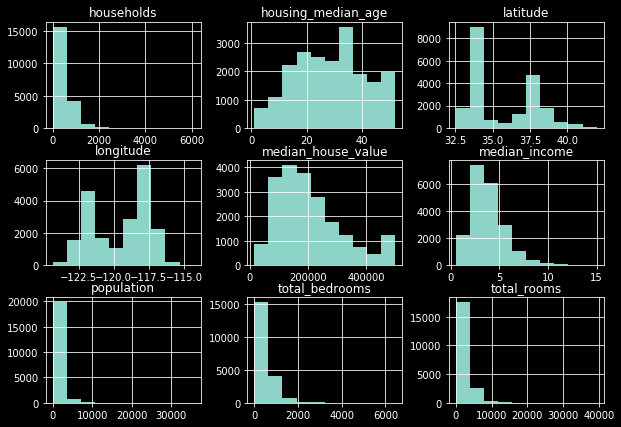

In [12]:
housing_csv.hist(figsize = (10, 7))

In [13]:
import numpy as np

In [14]:
housing_csv['income_cat'] = pd.cut(housing_csv['median_income'],
                                  bins = [0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                                  labels = [1, 2, 3, 4, 5])

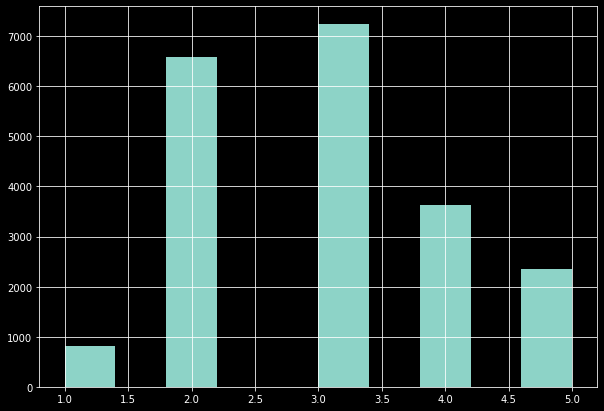

In [15]:
housing_csv['income_cat'].hist(figsize = (10, 7))

In [16]:
housing_csv

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [17]:
from sklearn.base import BaseEstimator, TransformerMixin

In [18]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

In [19]:
class Prepare_housing_csv(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = False):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        x1 = X[:, rooms_ix]/X[:, households_ix]
        x2 = X[:, population_ix]/X[:, households_ix]
        if self.add_bedrooms_per_room:
            x3 = X[:, bedrooms_ix]/X[:, rooms_ix]
            return np.c_[X, x1, x2, x3]
        return np.c_[X, x1, x2]

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [21]:
from sklearn.pipeline import Pipeline

In [22]:
housing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('prepare_housing_csv', Prepare_housing_csv()),
    ('std_scaler', StandardScaler()),
])

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
from sklearn.compose import ColumnTransformer

In [25]:
num_attr = list(housing_csv.drop('ocean_proximity', axis = 1))
cat_attr = ['ocean_proximity']

In [26]:
prepare_data = ColumnTransformer([
    ('num', housing_pipeline, num_attr),
    ('cat', OneHotEncoder(), cat_attr),
])

In [27]:
income_cat = housing_csv.income_cat.copy()

In [28]:
prepared_housing_csv = prepare_data.fit_transform(housing_csv)

In [29]:
prepared_housing_csv

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.        ,
         1.        ,  0.        ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.        ,
         1.        ,  0.        ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87362627,  1.77823747, -0.84539315, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.        ,
         0.        ,  0.        ]])

In [30]:
housing_csv = pd.DataFrame(prepared_housing_csv,
                           columns = 
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_preximity', 'income_cat', 'rooms_per_house_hold', 'population_per_room', 'incom_15k', 'income_30k', 'income_45k', 'income_60k'])
housing_csv

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_preximity,income_cat,rooms_per_house_hold,population_per_room,incom_15k,income_30k,income_45k,income_60k
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,1.890128,0.628559,-0.049597,0.0,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,1.890128,0.327041,-0.092512,0.0,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,1.890128,1.155620,-0.025843,0.0,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,0.941894,0.156966,-0.050329,0.0,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,-0.006340,0.344711,-0.085616,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.388283,-0.512592,-0.443449,-1.216128,-1.115804,-0.954574,-0.155023,-0.049110,0.0,1.0,0.0,0.0,0.0
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.922403,-0.944405,-1.008420,-0.691593,-1.124470,-0.954574,0.276881,0.005021,0.0,1.0,0.0,0.0,0.0
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.123608,-0.369537,-0.174042,-1.142593,-0.992746,-0.954574,-0.090318,-0.071735,0.0,1.0,0.0,0.0,0.0
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.304827,-0.604429,-0.393753,-1.054583,-1.058608,-0.954574,-0.040211,-0.091225,0.0,1.0,0.0,0.0,0.0


In [31]:
housing_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 17 columns):
longitude               20640 non-null float64
latitude                20640 non-null float64
housing_median_age      20640 non-null float64
total_rooms             20640 non-null float64
total_bedrooms          20640 non-null float64
population              20640 non-null float64
households              20640 non-null float64
median_income           20640 non-null float64
median_house_value      20640 non-null float64
ocean_preximity         20640 non-null float64
income_cat              20640 non-null float64
rooms_per_house_hold    20640 non-null float64
population_per_room     20640 non-null float64
incom_15k               20640 non-null float64
income_30k              20640 non-null float64
income_45k              20640 non-null float64
income_60k              20640 non-null float64
dtypes: float64(17)
memory usage: 2.7 MB


In [32]:
housing_csv.corr()['median_house_value'].sort_values(ascending = False)

median_house_value      1.000000
median_income           0.688075
ocean_preximity         0.643892
population_per_room     0.256617
income_45k              0.160284
income_cat              0.151948
income_60k              0.141862
total_rooms             0.134153
housing_median_age      0.105623
households              0.065843
total_bedrooms          0.049457
income_30k              0.023416
rooms_per_house_hold   -0.023737
population             -0.024650
longitude              -0.045967
latitude               -0.144160
incom_15k              -0.484859
Name: median_house_value, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [34]:
x_train, x_test, y_train, y_test = train_test_split(housing_csv.drop('median_house_value', axis = 1),
                                                    housing_csv['median_house_value'],
                                                    test_size = 0.3)

In [35]:
for i in [x_train, x_test, y_train, y_test]:
    print(i.shape)

(14448, 16)
(6192, 16)
(14448,)
(6192,)


In [36]:
splitter = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3)

In [37]:
housing_csv['income_cat'] = income_cat

In [38]:
for train_index, test_index in splitter.split(housing_csv, housing_csv['income_cat']):
    strat_train_set = housing_csv.loc[train_index]
    strat_test_set = housing_csv.loc[test_index]

In [39]:
strat_train_set['income_cat'].value_counts(ascending = True)

1     575
5    1654
4    2547
2    4607
3    5065
Name: income_cat, dtype: int64

In [40]:
strat_test_set['income_cat'].value_counts(ascending = True)

1     247
5     708
4    1092
2    1974
3    2171
Name: income_cat, dtype: int64

In [41]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis = 1, inplace = True)

In [42]:
strat_train_set.shape[1] == strat_test_set.shape[1]

True

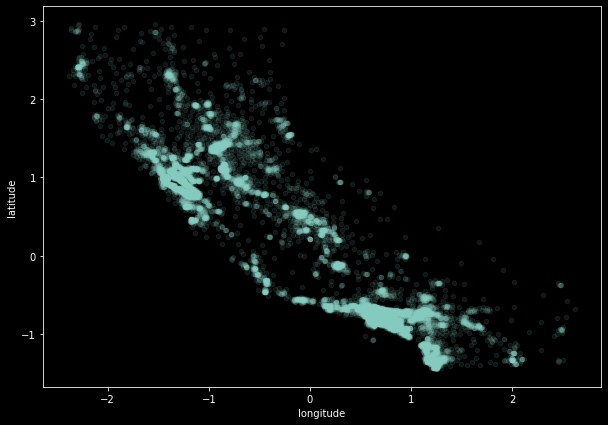

In [43]:
housing_csv.plot(kind = 'scatter', x = 'longitude', y = 'latitude',
                figsize = (10, 7), alpha = 0.1)

C:\Users\subho\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


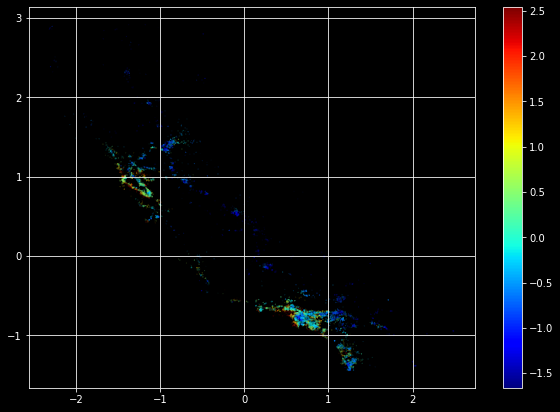

In [44]:
plt.figure(figsize = (10, 7))
plt.scatter(housing_csv['longitude'], housing_csv['latitude'],
           s = housing_csv['population']/100, cmap = plt.get_cmap('jet'),
           c = housing_csv['median_house_value'])
plt.colorbar()
plt.grid(True)

In [45]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001983A732748>,
      dtype=object)

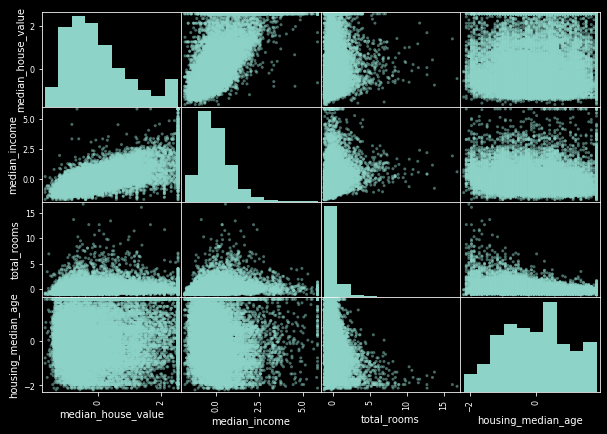

In [46]:
scatter_matrix(housing_csv[['median_house_value', 'median_income',
                           'total_rooms', 'housing_median_age']],
              figsize = (10, 7))

In [47]:
corr_matrix = housing_csv.corr()

In [48]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value      1.000000
median_income           0.688075
ocean_preximity         0.643892
population_per_room     0.256617
income_45k              0.160284
income_60k              0.141862
total_rooms             0.134153
housing_median_age      0.105623
households              0.065843
total_bedrooms          0.049457
income_30k              0.023416
rooms_per_house_hold   -0.023737
population             -0.024650
longitude              -0.045967
latitude               -0.144160
incom_15k              -0.484859
Name: median_house_value, dtype: float64

In [49]:
housing_x = strat_train_set.drop('median_house_value', axis = 1).copy()
housing_y = strat_train_set['median_house_value'].copy()

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lin_reg = LinearRegression()

In [52]:
lin_reg.fit(housing_x, housing_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
lin_reg.score(strat_test_set.drop('median_house_value', axis = 1), strat_test_set['median_house_value'])

0.5399699382741656

In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
housing_predict = lin_reg.predict(strat_test_set[:100].drop('median_house_value', axis = 1))
housing_predict

array([ 0.86627433,  0.93702178,  0.4836247 , -0.35711181, -0.45610682,
       -0.34730376, -0.18317984, -1.13638295, -1.23274718, -1.13464113,
        0.43286711,  0.50107002,  0.27774021, -0.48761284, -0.97923552,
       -0.88569855, -1.50999657, -0.59767195,  1.141836  ,  0.40783407,
        1.36297181, -0.97845976,  0.14527079, -0.50071441,  0.1922402 ,
        1.84712567, -0.04449704, -0.77905971, -0.29717055,  0.71146573,
        1.16925625,  0.55732117, -0.06375091, -0.02294159,  0.77738984,
        0.02458595,  0.05358627,  0.57554335, -0.08251816,  0.77244937,
        0.29994429, -0.28975475, -0.69771929, -0.71549817, -0.27986556,
       -0.24648655,  0.18657859,  1.09249798, -0.40493365,  0.15237232,
       -0.08914581,  0.23924132, -1.33184427, -0.0477716 ,  0.61738564,
       -1.09690585, -1.14632053, -0.08428056, -0.60318653,  0.77114948,
        0.97741332, -0.02082991, -1.33628612,  0.15489506,  0.049974  ,
        0.71491854, -0.923663  , -0.36559659,  0.17981288,  1.35

In [56]:
housing_target = strat_test_set['median_house_value'][:100]
housing_target

1688     0.101776
542      0.507347
8017     0.110442
7598    -0.824625
295     -1.006612
           ...   
8474    -0.221468
9365     1.721461
3748    -0.219735
12569   -0.914752
18983   -0.601041
Name: median_house_value, Length: 100, dtype: float64

In [57]:
lin_mse = mean_squared_error(housing_target, housing_predict)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.5707364570157536

In [58]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
dec_tree_reg = DecisionTreeRegressor()
dec_tree_reg.fit(housing_x, housing_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [60]:
dec_tree_reg.score(strat_test_set.drop('median_house_value', axis = 1), strat_test_set['median_house_value'])

0.6084239636279054

In [61]:
dec_tree_predicted = dec_tree_reg.predict(strat_test_set[:100].drop('median_house_value', axis = 1))

In [62]:
dec_tree_predicted

array([ 0.50301382,  1.84885145,  0.42588597, -0.89048709, -0.99794612,
       -1.22932966, -0.76222954, -0.68250188, -0.82635832, -1.12707027,
        0.30629447, -0.16773849, -0.35059215, -0.65910354, -1.0646747 ,
       -1.13920274, -0.81769227, -0.69723417,  0.9805132 ,  0.35482436,
        2.54041094,  0.53681141, -0.51091408, -0.94941623,  0.04544636,
        2.15302982,  0.1399063 , -0.96934815, -0.49271538,  0.13557328,
        0.56020975,  0.42935239, -0.76656257, -0.40345506,  2.54041094,
       -1.15653484,  0.62173871,  2.54041094, -0.23360047,  0.29069558,
       -0.35752499, -0.48404933, -0.88962049, -1.15306842, -0.50398124,
       -1.02307766,  1.86445034,  1.25869341, -0.37399049, -0.3592582 ,
       -0.4450521 , -0.38438975, -1.35325418,  1.24049471, -0.09841008,
       -1.05167563, -1.34545474, -0.33585986, -0.24486633,  1.11570358,
        1.08797222, -0.64003823, -1.31079054, -0.72323232, -0.2041359 ,
       -0.09321045, -0.73276497, -0.42772   , -0.45978438,  2.54

In [63]:
dec_tree_mse = mean_squared_error(housing_target, dec_tree_predicted)
dec_tree_rmse = np.sqrt(dec_tree_mse)
dec_tree_rmse

0.6558584401485712

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
scores = cross_val_score(lin_reg, housing_x, housing_y,
                        scoring = 'neg_mean_squared_error', cv = 10)

In [66]:
scores

array([-0.34546172, -0.37027169, -0.36131103, -0.33041053, -0.36954007,
       -0.3726558 , -0.35037505, -0.36965474, -0.35515038, -0.34652836])

In [67]:
scores.mean()

-0.35713593666004567

In [68]:
scores.std()

0.0132443786264477

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
forest_reg = RandomForestRegressor()

In [71]:
forest_reg.fit(housing_x, housing_y)

C:\Users\subho\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [72]:
forest_reg.score(strat_test_set.drop('median_house_value', axis = 1), strat_test_set['median_house_value'])

0.7951678133437395

In [73]:
forest_predicted = forest_reg.predict(strat_test_set[:100].drop('median_house_value', axis = 1))

In [74]:
forest_mse = mean_squared_error(strat_test_set[:100]['median_house_value'], forest_predicted)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.42539037759286363

In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
scores = cross_val_score(forest_reg, housing_x, housing_y,
                            scoring = 'neg_mean_squared_error', cv = 10)
scores

array([-0.2017644 , -0.24631816, -0.2242471 , -0.20090319, -0.2258684 ,
       -0.22936043, -0.21161867, -0.23402843, -0.20334076, -0.20150114])

In [77]:
scores.mean()

-0.21789506712473544

In [78]:
scores.std()

0.015402722415568278

In [79]:
from sklearn.externals import joblib

C:\Users\subho\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [80]:
joblib.dump(forest_reg, 'forest_reg.pkl')

['forest_reg.pkl']

In [81]:
my_model_loaded = joblib.load('forest_reg.pkl')

In [82]:
my_model_loaded.predict(strat_test_set.drop('median_house_value', axis = 1)[:1])

array([0.90026557])

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'n_estimators': [3, 10], 'max_features': [2, 4, 6], 'bootstrap': [False]},
]

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
forest_reg = RandomForestRegressor()

In [87]:
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                          scoring = 'neg_mean_squared_error',
                          return_train_score = True)

In [88]:
grid_search.fit(housing_x, housing_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [89]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [90]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [92]:
cvres = grid_search.cv_results_
cvres

{'mean_fit_time': array([0.04981999, 0.14997969, 0.45523086, 0.07115474, 0.23061514,
        0.6773654 , 0.09230957, 0.30720615, 0.91569972, 0.11776614,
        0.38760152, 1.1514008 , 0.07223506, 0.23070054, 0.10807099,
        0.3599431 , 0.14775252, 0.48683181]),
 'std_fit_time': array([0.00359382, 0.00465964, 0.01033928, 0.0034133 , 0.00553318,
        0.00684071, 0.00442731, 0.00561605, 0.00848799, 0.00201556,
        0.00362024, 0.00495112, 0.00292234, 0.00602372, 0.00263646,
        0.00543229, 0.00382639, 0.00477156]),
 'mean_score_time': array([0.00321836, 0.00791163, 0.02109747, 0.00220284, 0.00583062,
        0.02016282, 0.00284772, 0.00913105, 0.01745577, 0.00465512,
        0.00671144, 0.02028494, 0.00133085, 0.00989451, 0.00509686,
        0.00959458, 0.00536251, 0.00698171]),
 'std_score_time': array([0.00185465, 0.002558  , 0.00161819, 0.00194771, 0.00150004,
        0.0002354 , 0.0027564 , 0.00129428, 0.00288386, 0.00272695,
        0.00282533, 0.00040799, 0.00117682, 

In [94]:
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

0.5509395721737409 {'max_features': 2, 'n_estimators': 3}
0.4810989647312023 {'max_features': 2, 'n_estimators': 10}
0.46142300732449 {'max_features': 2, 'n_estimators': 30}
0.5306100487512779 {'max_features': 4, 'n_estimators': 3}
0.467477052951591 {'max_features': 4, 'n_estimators': 10}
0.44865444006299937 {'max_features': 4, 'n_estimators': 30}
0.5163547654713436 {'max_features': 6, 'n_estimators': 3}
0.46558793035434487 {'max_features': 6, 'n_estimators': 10}
0.44719201770559225 {'max_features': 6, 'n_estimators': 30}
0.5237367599738899 {'max_features': 8, 'n_estimators': 3}
0.4636378015258016 {'max_features': 8, 'n_estimators': 10}
0.4456627542350853 {'max_features': 8, 'n_estimators': 30}
0.5360669934948911 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.4760490711010993 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.512383781214168 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
0.46221875155448183 {'bootstrap': False, 'max_features': 4, 'n